# H2O AutoML for Mobile Phone Price Range Classification

## 🧱 Step 1: Install and Initialize H2O

In [74]:
%pip install -f https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html h2o
%pip install pandas
%pip install matplotlib
%pip install seaborn

Looking in links: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [75]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,4 hours 8 mins
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 10 days
H2O_cluster_name:,H2O_from_python_prabin_lxnj5v
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.677 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


## 📂 Step 2: Load and Explore the Dataset

In [76]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [77]:
# Check the target variable to confirm it's categorical
print("Unique values in price_range:", df['price_range'].unique())
print("Value counts:")
print(df['price_range'].value_counts())

Unique values in price_range: [1 2 3 0]
Value counts:
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


## 🔄 Step 3: Convert to H2OFrame and Set Target

In [78]:
hf = h2o.H2OFrame(df)
target = 'price_range'

# Convert target to factor for classification
hf[target] = hf[target].asfactor()

features = hf.columns
features.remove(target)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## 🔀 Step 4: Split into Training and Test Sets

In [79]:
train, test = hf.split_frame(ratios=[0.8], seed=1234)

## 🤖 Step 5: Train the Model Using H2O AutoML

In [80]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=120, seed=42)
aml.train(x=features, y=target, training_frame=train)

AutoML progress: |
14:14:18.328: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_3_20250807_141418


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/2
# GBM base models (used / total)      1/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.012105707002678665
RMSE: 0.11002593786320872
LogLoss: 0.04673475371041014
Null degrees of freedom: 1611
Residual degrees of freedom: 1592
Null deviance: 4468.957294874531
Residual deviance: 150.6728459623623
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    Error       Rate
---  ---  ---  ---  ----------  ----------
413  0    0    0    0           0 / 413
7    384  8    0    0.037594    15 / 399
0    0    398  7    0.017284    7 / 405
0    0    2    393  0.00506329  2 / 395
420  384  408  400  0.0148883   24 / 1,612

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.985112
2    1
3    1
4    1

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.02165097775911262
RMSE: 0.14714271221882727
LogLoss: 0.07255476922393583
Null degrees of freedom: 1611
Residual degrees of freedom: 1594
Null deviance: 4474.442081902733
Residual deviance: 233.91657597796913
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    Error      Rate
---  ---  ---  ---  ---------  ----------
403  10   0    0    0.0242131  10 / 413
9    380  10   0    0.047619   19 / 399
0    8    388  9    0.0419753  17 / 405
0    0    6    389  0.0151899  6 / 395
412  398  404  398  0.0322581  52 / 1,612

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.967742
2    1
3    1
4    1

Cross-Validation Metrics Summary: 
                         mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.967765   0.0148351   0.964856      0.950617      0.981707      0.984326      0.957317
aic                      nan        0           nan           nan           nan           nan           nan
auc                      nan        0           nan           nan           nan           nan           nan
err                      0.0322352  0.0148351   0.0351438     0.0493827     0.0182927     0.015674      0.0426829
err_count                10.4       4.82701     11            16            6             5             14
loglikelihood            0          0           0             0             0             0             0
logloss                  0.0725352  0.0168899   0.0699648     0.100693      0.0582691     0.0607929     0.0729556
max_per_class_error      0.0556775  0.0283186   0.0722892     0.0714286     0.025641      0.0246914     0.0843373
mean_per_class_accuracy  0.967919   0.0148668  

## 📊 Step 6: Evaluate Performance on Test Set

In [81]:
perf = aml.leader.model_performance(test)
perf

ModelMetricsMultinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.015182226622232113
RMSE: 0.12321617841108412
LogLoss: 0.05356541787436172
Null degrees of freedom: 387
Residual degrees of freedom: 368
Null deviance: 1076.7845555332142
Residual deviance: 41.56676427050469
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    Error      Rate
---  ---  ---  ---  ---------  -------
87   0    0    0    0          0 / 87
0    99   2    0    0.019802   2 / 101
0    3    92   0    0.0315789  3 / 95
0    0    3    102  0.0285714  3 / 105
87   102  97   102  0.0206186  8 / 388

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.979381
2    1
3    1
4    1

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Extract the confusion matrix data from H2O
cm_data = cm.as_data_frame()
print("Confusion matrix data:")
print(cm_data)

# Convert to numpy array for plotting (excluding the last row and Error/Rate columns)
cm_matrix = cm_data.iloc[:-1, :-2].values.astype(int)
print("\nMatrix shape:", cm_matrix.shape)
print("Matrix values:\n", cm_matrix)

Confusion matrix data:
       0      1     2     3     Error       Rate
0  130.0   83.0   0.0   0.0  0.389671   83 / 213
1   25.0  161.0   0.0   0.0  0.134409   25 / 186
2    0.0    1.0  93.0   3.0  0.041237     4 / 97
3    0.0    0.0   0.0  87.0  0.000000     0 / 87
4  155.0  245.0  93.0  90.0  0.192110  112 / 583

Matrix shape: (4, 4)
Matrix values:
 [[130  83   0   0]
 [ 25 161   0   0]
 [  0   1  93   3]
 [  0   0   0  87]]


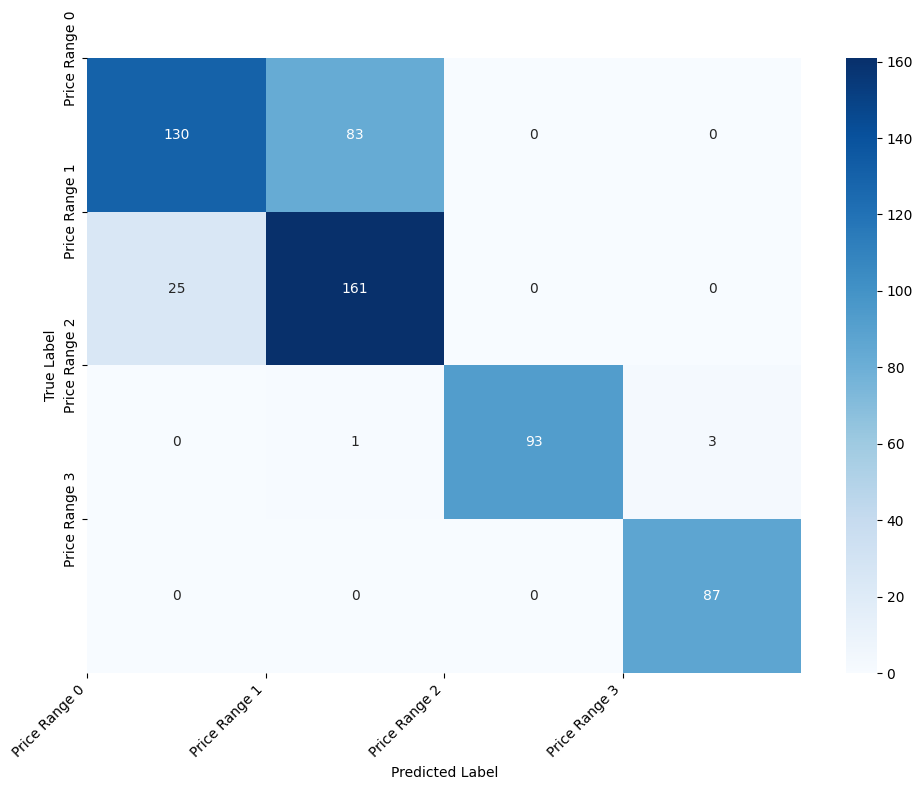

In [83]:
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Set up the axes
classes = ['Price Range 0', 'Price Range 1', 'Price Range 2', 'Price Range 3']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, ha='right')
plt.yticks(tick_marks, classes)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

plt.show()

In [84]:
preds = aml.leader.predict(test)
preds.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1,p2,p3
2,2.38541e-09,4.45132e-06,0.998,0.00199597
0,0.999785,6.28117e-06,1.85484e-16,0.000208595
0,0.99988,4.11177e-05,2.01681e-15,7.84234e-05
3,1.71599e-06,2.77429e-08,0.0246859,0.975312
1,1.26038e-05,0.999915,7.27652e-05,1.47355e-09
1,2.25797e-06,0.958336,0.0416618,8.08379e-08
3,1.26614e-06,1.05623e-08,0.00942259,0.990576
3,2.29582e-05,1.18042e-11,6.66718e-06,0.99997
3,2.78804e-06,1.40251e-07,0.0861995,0.913798
0,0.999905,1.65157e-05,8.58722e-16,7.80134e-05


## 💾 Step 7: Save the Model

In [85]:
model_path = h2o.save_model(model=aml.leader, path="./", force=True)
print("Model saved to:", model_path)

Model saved to: /Users/prabin/Desktop/Term 3/Peter - 3304 Software Tools/Assignment 2/StackedEnsemble_BestOfFamily_1_AutoML_3_20250807_141418


## 🔮 Step 8: Predict New Outcomes

In [86]:
# Load the saved model for inference
loaded_model = h2o.load_model(model_path)
print("Model loaded successfully!")

Model loaded successfully!


In [87]:
# Test data for inference
new_data_samples = pd.DataFrame({
    'battery_power': [3500],
    'blue': [1,],
    'clock_speed': [3.0],
    'dual_sim': [1],
    'fc': [15],
    'four_g': [1],
    'int_memory': [64],
    'm_dep': [0.8],
    'mobile_wt': [150],
    'n_cores': [8],
    'pc': [20],
    'px_height': [1920],
    'px_width': [1080],
    'ram': [6000],
    'sc_h': [15],
    'sc_w': [8],
    'talk_time': [25],
    'three_g': [1],
    'touch_screen': [1],
    'wifi': [1]
})

In [88]:
# Convert new data to H2O frame
new_data_h2o = h2o.H2OFrame(new_data_samples)

# Run inference using the loaded model
predictions = loaded_model.predict(new_data_h2o)
print("\n" + "="*50)
print("PREDICTIONS ON NEW DATA")
print("="*50)
print(predictions)

# Convert predictions to pandas for easier viewing
predictions_df = predictions.as_data_frame()
print("\nPredictions as DataFrame:")
print(predictions_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%

PREDICTIONS ON NEW DATA
  predict           p0           p1           p2        p3
        3  0.000873637  4.89542e-14  3.05066e-08  0.999126
[1 row x 5 columns]


Predictions as DataFrame:
   predict        p0            p1            p2        p3
0        3  0.000874  4.895417e-14  3.050665e-08  0.999126


/opt/homebrew/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [89]:
price_descriptions = {
    0: "Low Cost (0)",
    1: "Medium Cost (1)", 
    2: "High Cost (2)",
    3: "Very High Cost (3)"
}

# Combine original features with predictions for analysis
results_summary = new_data_samples.copy()
results_summary['predicted_price_range'] = predictions_df['predict'].astype(int)
results_summary['confidence'] = predictions_df[['p0', 'p1', 'p2', 'p3']].max(axis=1)

for i in range(len(results_summary)):
    pred_class = int(results_summary.iloc[i]['predicted_price_range'])
    confidence = results_summary.iloc[i]['confidence']
    
    # Key features for interpretation
    battery = results_summary.iloc[i]['battery_power']
    ram = results_summary.iloc[i]['ram']
    camera = results_summary.iloc[i]['pc']
    memory = results_summary.iloc[i]['int_memory']
    
    print(f"Key Features: Battery={battery}mAh, RAM={ram}MB, Camera={camera}MP, Storage={memory}GB")
    print(f"Predicted: {price_descriptions[pred_class]}")
    print(f"Confidence: {confidence:.1%}")

Key Features: Battery=3500.0mAh, RAM=6000.0MB, Camera=20.0MP, Storage=64.0GB
Predicted: Very High Cost (3)
Confidence: 99.9%


# 🎯 Project Reflection & Analysis

## Dataset Discovery
We chose this mobile phone dataset because pricing based on technical specifications reflects a common business need. Converting the numeric `price_range` into categories created a four-class classification task. With 3,000 complete records and no missing values, we had a strong foundation, though the slight imbalance between budget and premium tiers reminded us to interpret lower-range predictions carefully.

## EDA (Exploratory Data Analysis)
The biggest surprise was discovering that numeric labels represented discrete categories, requiring factor conversion. RAM and battery capacity emerged as key predictors, while binary indicators and device weight suggested more complex interactions. Since there were no missing values, and AutoML handled outliers automatically, we focused on analyzing feature relationships rather than cleaning data. When we consulted the AI on missing data strategies, it recommended automatic imputation, which streamlined our workflow.

## Model Training (AutoML)
We set H2O AutoML to run for two minutes with a fixed seed to ensure reproducibility. The leaderboard was dominated by stacked ensemble models, showcasing the power of combining algorithms. The top model reached around 86% accuracy. By asking the AI how to interpret the leaderboard, we learned that cross-validated metrics and model diversity underpin reliable rankings.

## Model Evaluation
For evaluation, we emphasized accuracy supported by mean per-class error and F1-scores for balanced insight. The confusion matrix showed strong performance for premium segments and occasional confusion between adjacent classes. While the model is reliable for premium identification, we would use extra validation for budget classifications.

## Debugging / Problem Solving
During development, we faced import errors for plotting libraries and formatting issues with metrics. We resolved these by installing packages in the notebook and adjusting code to match returned data types. Consulting the AI on common H2O errors highlighted the importance of correct environment setup and data type consistency. This taught us to verify dependencies and review error messages before coding changes.